# EDA Analysis of Most Expensive Football Player Transfer (2000-2019)
##### Project Team Members:


In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#uploads and cleaning
PAth="Data/Top_Football_transfers.csv"
df=pd.read_csv(PAth)
new = df["Season"].str.split("-",n = 1, expand = True)
df["Year"]= new[0]
df.pop("Season")
df1=pd.DataFrame(df)

In [3]:
#First plot Calculation
df2 = df1.groupby('League_to').mean()['Transfer_fee'].reset_index().sort_values(by='Transfer_fee', ascending=False)
top10 = df2.head(10)
top10.head()
top10.Transfer_fee = top10.Transfer_fee / 1e6 
#Second plot Calculation
topleagues=df1["League_to"].value_counts()[:5].index
topLeagues=df1[df1.League_to.isin(topleagues.tolist())]
topteams=topLeagues[topLeagues["League_to"]=="LaLiga"]
condition= topteams["Team_to"].value_counts()[:10].index.tolist()
topLaligaTeams=topteams[topteams.Team_to.isin(condition)]
#Third plot calculation
df3 = df1.groupby('Name').sum()['Transfer_fee'].reset_index().sort_values(by='Transfer_fee', ascending=False)
topplayers = df3.head(10)
topplayers.Transfer_fee = topplayers.Transfer_fee / 1000000
topplayers
#Fourth plot calculation
df4 = df1.groupby('Name').sum()['Market_value'].reset_index().sort_values(by='Market_value', ascending=False)
topplayers1 = df4.head(10)
obj1=topplayers1["Name"].tolist()
players1=df1[df1.Name.isin(obj1)]

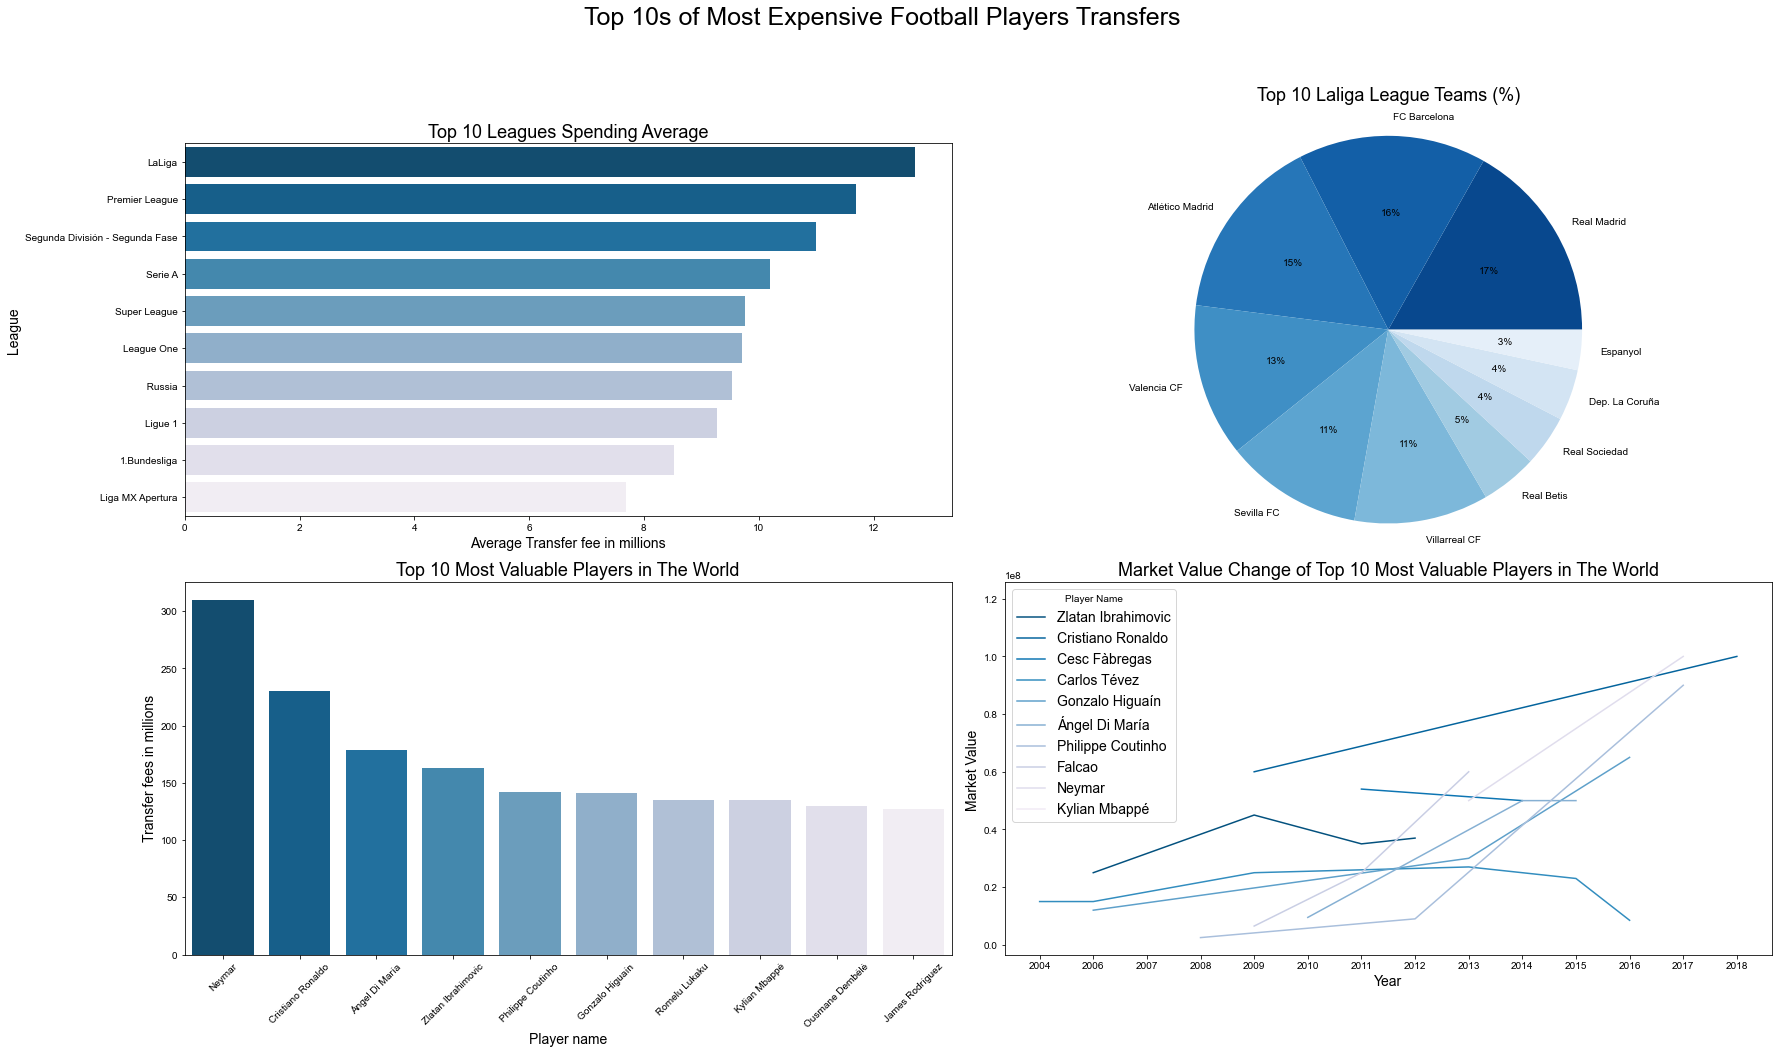

In [4]:
fig, ax = plt.subplots(2,2, figsize=(25,15))
fig.suptitle("Top 10s of Most Expensive Football Players Transfers\n\n").set_size(25)

#Plot 1
a= sns.barplot(
    ax=ax[0,0],
    data = top10,
    x="Transfer_fee",
    y = "League_to",
    alpha = 1,
    palette=sns.color_palette("PuBu_r",10))
a.set_title("Top 10 Leagues Spending Average", size=18, y=1) 
a.set_xlabel("Average Transfer fee in millions",fontsize='14', horizontalalignment='center')
a.set_ylabel("League",fontsize='14', horizontalalignment='center')

#Plot 2
topLaligaTeams["Team_to"].value_counts()\
                    .plot(kind="pie", legend=False, autopct='%2.0f%%', xlabel=" ", ylabel=" ", 
                    radius = 1.3,colors= sns.color_palette("Blues_r",10), wedgeprops={'alpha':1},ax=ax[0,1], )\
                    .set_title("Top 10 Laliga League Teams (%)", size=18, y=1.1)
#Plot 3
b= sns.barplot(
    ax=ax[1,0],
    data = topplayers,
    x="Name",
    y = "Transfer_fee",
    alpha = 1,
    palette= sns.color_palette("PuBu_r",10)
)
for item in b.get_xticklabels():
    item.set_rotation(45)
b.set_title("Top 10 Most Valuable Players in The World", size=18, y=1)
b.set_xlabel('Player name',fontsize='14', horizontalalignment='center')#.set_xticklabels(rotation=90,)
b.set_ylabel('Transfer fees in millions',fontsize='14', horizontalalignment='center')

#Plot 4
c=sns.lineplot(
    ax=ax[1,1],
    x='Year', 
    y='Market_value',
    hue='Name', 
    data =players1, 
    palette=sns.color_palette("PuBu_r",10),alpha=1)
c.set_title("Market Value Change of Top 10 Most Valuable Players in The World",fontsize=18)
c.set_ylabel('Market Value ',fontsize='14', horizontalalignment='center')
c.set_xlabel('Year',fontsize='14', horizontalalignment='center');
plt.legend(loc='upper left',fontsize=14, title="Player Name")

fig.tight_layout()
plt.style.use("seaborn-dark")
plt.savefig("supplot.png",dpi=200)
plt.show();


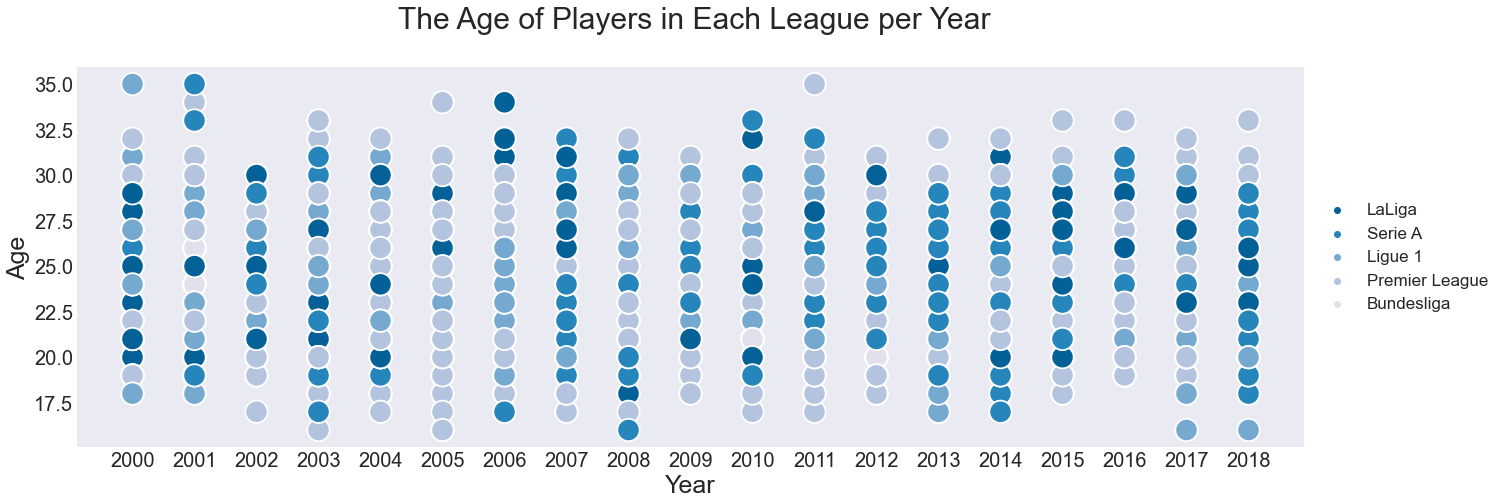

In [7]:
#Fifth chart calculation
condition1 =((df1["League_to"]=="LaLiga") | (df1["League_to"]=="Serie A") 
             | (df1["League_to"]=="Premier League") | (df1["League_to"]=="Ligue 1")| (df1["League_to"]=="Bundesliga") )
df2=df1[condition1][:]
plt.figure(figsize=(22,7))
sns.scatterplot(data = df2, x='Year',y="Age",hue='League_to',s=500,palette=sns.color_palette("PuBu_r",5),alpha=1) # create scatter plot 
sns.despine(top=True, right=True, left=False, bottom=False) # remove border

# axis lablel 
plt.xlabel('Year', fontsize='25', horizontalalignment='center')
plt.ylabel('Age', fontsize='25', horizontalalignment='center')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc='center left',bbox_to_anchor=[1,0.5],fontsize=17)
plt.title(' The Age of Players in Each League per Year\n ', fontsize=30)
plt.style.use("seaborn-dark")
#sns.set_style('whitegrid')
#plt.style.use("dark_background")

plt.rcParams['legend.title_fontsize']='large'
plt.savefig("aa.png")

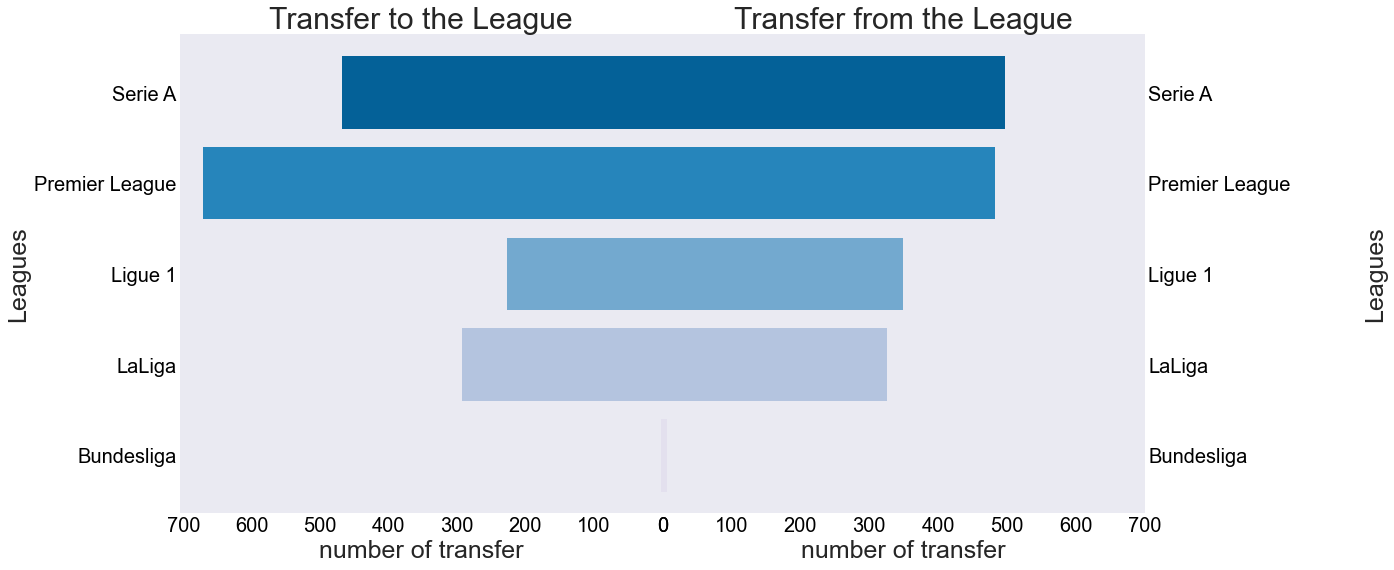

In [6]:
#Sixth chart calculation
import warnings
warnings.filterwarnings('ignore')

condition1 =((df1["League_from"]=="LaLiga") | (df1["League_from"]=="Serie A") 
             | (df1["League_from"]=="Premier League") | (df1["League_from"]=="Ligue 1")| (df1["League_from"]=="Bundesliga") )
df8=pd.DataFrame(df2[condition1][:])
df10=df8.groupby(["League_from"])[["League_from"]].count()
df10["new"]=df8.groupby(["League_to"])[["League_to"]].count()

index = df10.index
column0 = df10['new']
column1 = df10['League_from']
title0 ='Transfer to the League'
title1 ='Transfer from the League'
fig, axes = plt.subplots(figsize=(20,7), ncols=2)
fig.tight_layout()

#sns.set_style('whitegrid')
#plt.style.use("dark_background")
plt.style.use("seaborn-dark")

axes[0].barh(index, column0, align='center', color=sns.color_palette("PuBu",5),alpha=1)
axes[0].set_title(title0, fontsize=30 )
axes[1].set_title(title1, fontsize=30)

axes[0].set_ylabel("Leagues", fontsize=25 )
axes[0].set_xlabel("number of transfer", fontsize=25 )
axes[1].set_xlabel("number of transfer", fontsize=25 )

plt.ylabel("Leagues", fontsize=25,labelpad=-725)

axes[1].barh(index, column1, align='center', color=sns.color_palette("PuBu",5),alpha=1 )
axes[1].set_title(title1, fontsize=30)
    
axes[0].invert_xaxis() 
axes[1].invert_yaxis()
# To show data from highest to lowest
plt.gca().invert_yaxis()     
axes[0].set(yticks=df10.index, yticklabels=df10.index,)
axes[1].yaxis.tick_right()
axes[0].yaxis.tick_left()

              
axes[0].tick_params(axis='both', colors='black',labelsize = 20)
axes[1].tick_params(axis='both', colors='black',labelsize = 20) 

axes[0].set_xticks([0, 100, 200, 300, 400, 500, 600, 700],)
axes[1].set_xticks([0, 100, 200, 300, 400, 500,600,700])
plt.subplots_adjust(wspace=0, top=0.95, bottom=0, left=0.18, right=0.85)

plt.show();

# Findings Report

The dataset contains the top 250 expensive football player transfers of each year (2000-2018). It contains the following columns: player name, past team and league, the league and team where a player is sold, an estimation of the market value of the player, an actual value of transfer fees, the player position, and the year of transfer. The data was built upon seasons but the data scientist decided to change the seasons into years to make it easier to read. It was on (Year1-Year2) format and changed to (Year1) format. The below insights are derived from 6 charts that were generated from the dataset. 

*The 1st chart* shows the Top 10 Leagues by the highest spending fees on players over 18 years. We can see that the first-place league is Laliga.
*The 2nd chart* shows the distribution of the Top 10 teams that has successful transfers on Laliga league (in Percentage). Real Madrid takes the highest percentage with 17% of transfers. 
*The 3rd chart* shows the top 10 players chosen by the highest average of transfer fees. Neymar has the highest average among all players and James Rodríguez has the least average. 
*The 4th chart* shows the market value change of the Top 10 most valuable players over 18 years. Interestingly, we have 2 players with the same highest market value, Neymar and Cristiano Ronaldo. In the other hand, the number of lines doesn’t match the number of players which indicates that the player assigned market value didn’t change.  
*In the 5th chart*, the age of players in each league per year is presented as a scatter plot. We can see in 2005 that Premier League has taken players of all ages. After 2005, we can identify that Serie A League has taken players more frequently than other leagues over the years. 
*In 6th chart*, it presents the number of players transferred from and transferred to during the famous leagues. Premier League has the highest number of successful deals unlike Serie A has the highest transferred number. Overall, we can see duplicated league names and players' names which indicates their dominance in their fields.

